In [1]:
import numpy as np
import matplotlib.pyplot as plt

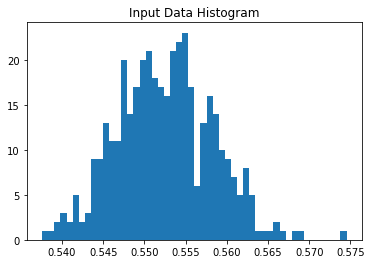

[1.39708449e+00 5.52490547e-01 2.61166211e-01 1.33786329e-01
 7.15226012e-02 3.91613059e-02 2.17513493e-02 1.21841578e-02
 6.86162328e-03 3.87712484e-03 2.19630206e-03 1.24595087e-03
 7.07645025e-04 4.02144073e-04 2.28588917e-04 1.29972108e-04
 7.39045455e-05 4.20212449e-05 2.39003473e-05 1.35950511e-05
 7.73489725e-06 4.40030733e-06 2.50284446e-06 1.42369796e-06
 8.09831711e-07 4.60636308e-07 2.62063168e-07 1.49079566e-07
 8.48172575e-08 4.82478309e-08 2.74425591e-08]
31


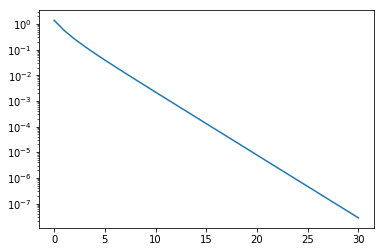

In [39]:
Nmeas = 400
filelist= ["./B6664andB7280EuclideanCorrelatorsCharmoniumT0/B6664/Mc32x32_30."+ str(k)  for k in range(1,Nmeas+1)];
RawCorrelators = [np.loadtxt(f, skiprows=0) for f in filelist]
#print(RawCorrelators[4])


#stacks all the elements of measurement point k into a single array, correct interpretation? 
DataArrayIndiv=np.column_stack(RawCorrelators[k][1:,2] for k in range(Nmeas))


#Histogram of the data from a single measurement point in this case 1
F01=plt.figure()
plt.yscale('linear')
plt.title('Input Data Histogram')
plt.hist(DataArrayIndiv[1],bins=50);
plt.show()


DataAverage=np.average(DataArrayIndiv,axis=1)
print(DataAverage)
plt.yscale('log')
plt.plot(DataAverage)

print(len(DataAverage))

In [33]:
#Kernel definition
Nw=2000;
Nt = 31;

wmin=0.001;
wmax=6.;
dw=(wmax-wmin)/Nw;

Frequencies = np.array([wmin+dw*w for w in range(Nw)])

Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
                    dw*np.exp(-Frequencies[w]*t)
                  for w in range(Nw) ] for t in range(1,Nt+1)]);
print(Kernel.shape)



(31, 2000)


In [34]:
AutoCorrelationCorr=1.; 

DataCovarianceMatrix=AutoCorrelationCorr*np.array([[ sum( np.array([ ( DataArrayIndiv[i,n]-DataAverage[i] )*
                                     ( DataArrayIndiv[i,n]-DataAverage[j] )/((Nmeas-1.)*Nmeas) for n in range(Nmeas)]) )
                  for i in range(Nt) ] for j in range(Nt)]);
print(DataCovarianceMatrix.shape)
print(DataCovarianceMatrix)

(31, 31)
[[2.33784781e-07 9.65368021e-08 3.90850621e-08 1.63987749e-08
  7.12424028e-09 3.19844945e-09 1.42678286e-09 6.37428459e-10
  2.87544306e-10 1.29332088e-10 5.79373458e-11 2.57271123e-11
  1.12811374e-11 4.89322727e-12 2.09540076e-12 8.87188174e-13
  3.71959945e-13 1.54630761e-13 6.40081944e-14 2.63212975e-14
  1.07637343e-14 4.36748563e-15 1.75996002e-15 7.05202859e-16
  2.81315536e-16 1.11992439e-16 4.43662160e-17 1.75086701e-17
  6.88382317e-18 2.69640319e-18 1.05378677e-18]
 [2.33784781e-07 9.65368021e-08 3.90850621e-08 1.63987749e-08
  7.12424028e-09 3.19844945e-09 1.42678286e-09 6.37428459e-10
  2.87544306e-10 1.29332088e-10 5.79373458e-11 2.57271123e-11
  1.12811374e-11 4.89322727e-12 2.09540076e-12 8.87188178e-13
  3.71959945e-13 1.54630759e-13 6.40081936e-14 2.63212977e-14
  1.07637345e-14 4.36748572e-15 1.75995987e-15 7.05202780e-16
  2.81315548e-16 1.11992430e-16 4.43662107e-17 1.75086647e-17
  6.88382598e-18 2.69640190e-18 1.05378636e-18]
 [2.33784781e-07 9.65368021

In [35]:

RM=np.array([[  np.exp(-(wmin+dw*w)*t) for w in range(Nw) ] for t in range(1,Nt+1)])

R = np.array([sum(RM[i,j]*(0.5 if j==0 or j==Nw-1 else 1.) for j in range(Nw)) for i in range(Nt)])*dw
S = DataCovarianceMatrix

In [36]:
#antiderivative of "spread matrix"
def intW(i,j,w,x):
    return np.exp(-x*(i+j)) * (-2 + 2*j*(w-x) - i**2*(w-x)**2 - j**2*(w-x)**2 - 2*i*(-w+x)*(1+j*(-w+x))) / (i+j)**3
   

In [37]:
W = np.empty((Nt,Nt))
u = np.empty(Nw)
l=10
for x in range(Nw):
   
    wcurrent = wmin+dw*x
    
    #Computing spread matrix
    for i in range(Nt):
        for j in range(Nt):
            W[i,j]=0
            if(i > j):
                W[i,j] = W[j,i]
            else:
                W[i,j] = intW(i+1,j+1, wcurrent, wmax) - intW(i+1,j+1, wcurrent, wmin)
            
    
    y = np.linalg.solve((W+1e2*S),R)
    
    u[x] = (DataAverage@y)/(R@y)
    
    
    


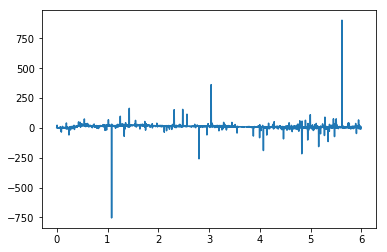

In [38]:
plt.plot(Frequencies,u)

In [ ]:
Nmu = Nt
W = np.empty((Nmu,Nmu))
u = np.empty(Nw)
for x in range(Nw):
    
    print(x)
   
    wcurrent = wmin+dw*x
    
    #Computing spread matrix
    for i in range(Nmu):
        for j in range(Nmu):
            W[i,j]=0
            if(i > j):
                W[i,j] = W[j,i]
            else:
                for w in range(Nw):
                    dwc = (0.5 if w == 0 or w== Nw-1 else 1.)*dw
                    W[i,j] += (Frequencies[w]-wcurrent)**2*RM[i,w]*RM[j,w]*dwc
            
    winv = np.linalg.solve((W+10*S),R)
    
    u[x] = (DataAverage@winv)/(R@winv)

In [ ]:
plt.plot(Frequencies,u/Frequencies)

In [ ]:
plt.yscale('log')
#plt.xscale('log')
plt.plot(DataAverage)
plt.plot(np.dot(Kernel,u))